# **Proyek Pertama : Predictive Analytics**


### **Nama : Nurul Nyi Qoniah**
### **Email : nurulqoniah313@gmail.com**
### **Username : nurqoneah**



## **Deskripsi**
Membuat model predictive analytics (housing price prediction) menggunakan dataset dari Kaggle [Housing Dataset](https://www.kaggle.com/code/abdelrahmanramadan2/housing-price-prediction-using-linear-regression)

## **Business Understanding**
Untuk mengoptimalkan keuntungan perusahaan, dibutuhkan satu keputusan untuk menentukan harga jual rumah yang sesuai. Perusahaan memiliki dataset harga properti rumah untuk membantu perusahaan dalam menentukan harga jual yang sesuai berdasarkan faktor-faktor seperti area, kamar tidur, dan lain-laini.

## **Data Understanding**

Dataset [Housing Dataset](https://www.kaggle.com/code/abdelrahmanramadan2/housing-price-prediction-using-linear-regression) memiliki 13 fitur dan 545 record data harga untuk setiap rumahnya. Kesemua feature dapat digunakan untuk memprediksi harga rumah yang sesuai.

## **Data Loading**


### **Import library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Load Dataset**

In [2]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **Exploratory Data Analysis**

In [3]:
df.shape

(545, 13)

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## **Menangani Missing Value**

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## **Menangani Outliers**

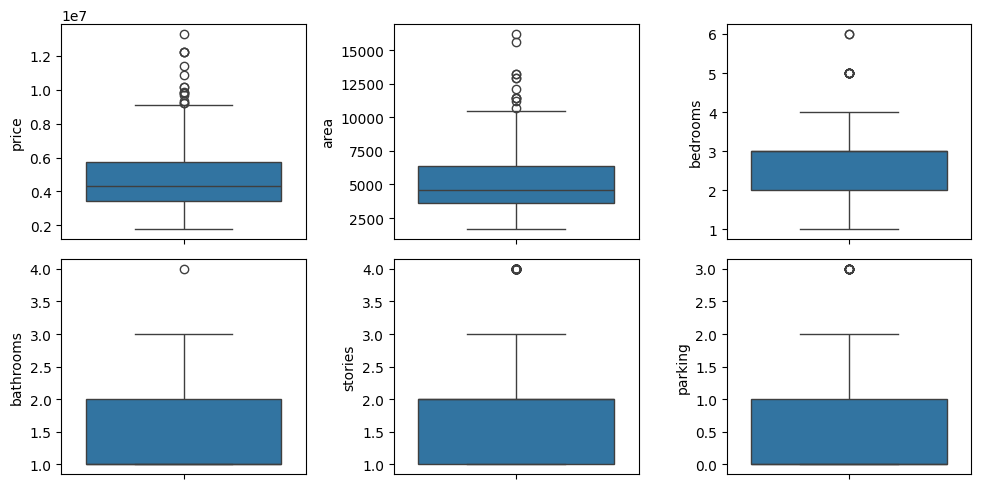

In [7]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

In [8]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR=Q3-Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

# Cek ukuran dataset setelah kita drop outliers price
df.shape

(530, 13)

In [9]:
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR=Q3-Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

# Cek ukuran dataset setelah kita drop outliers area
df.shape

(517, 13)

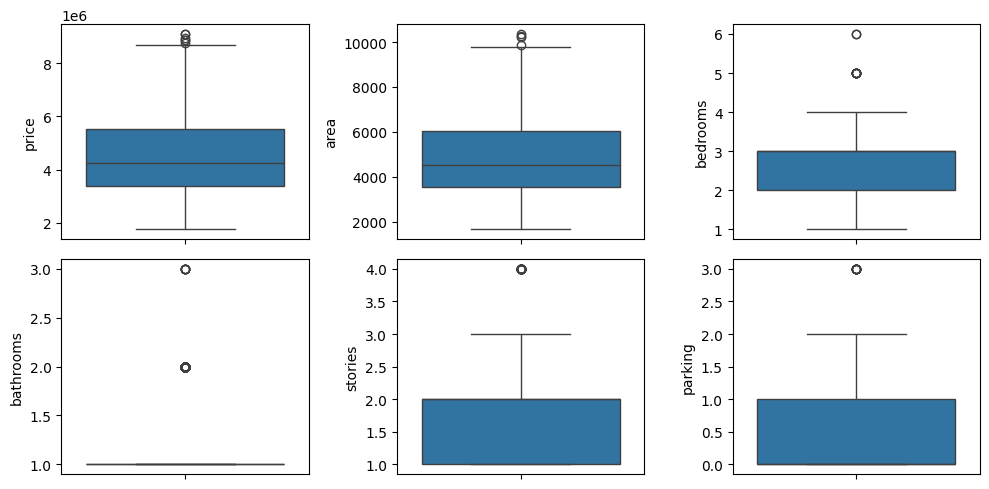

In [10]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

## **Univariate Analysis**

In [11]:
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning','prefarea' ,'furnishingstatus']

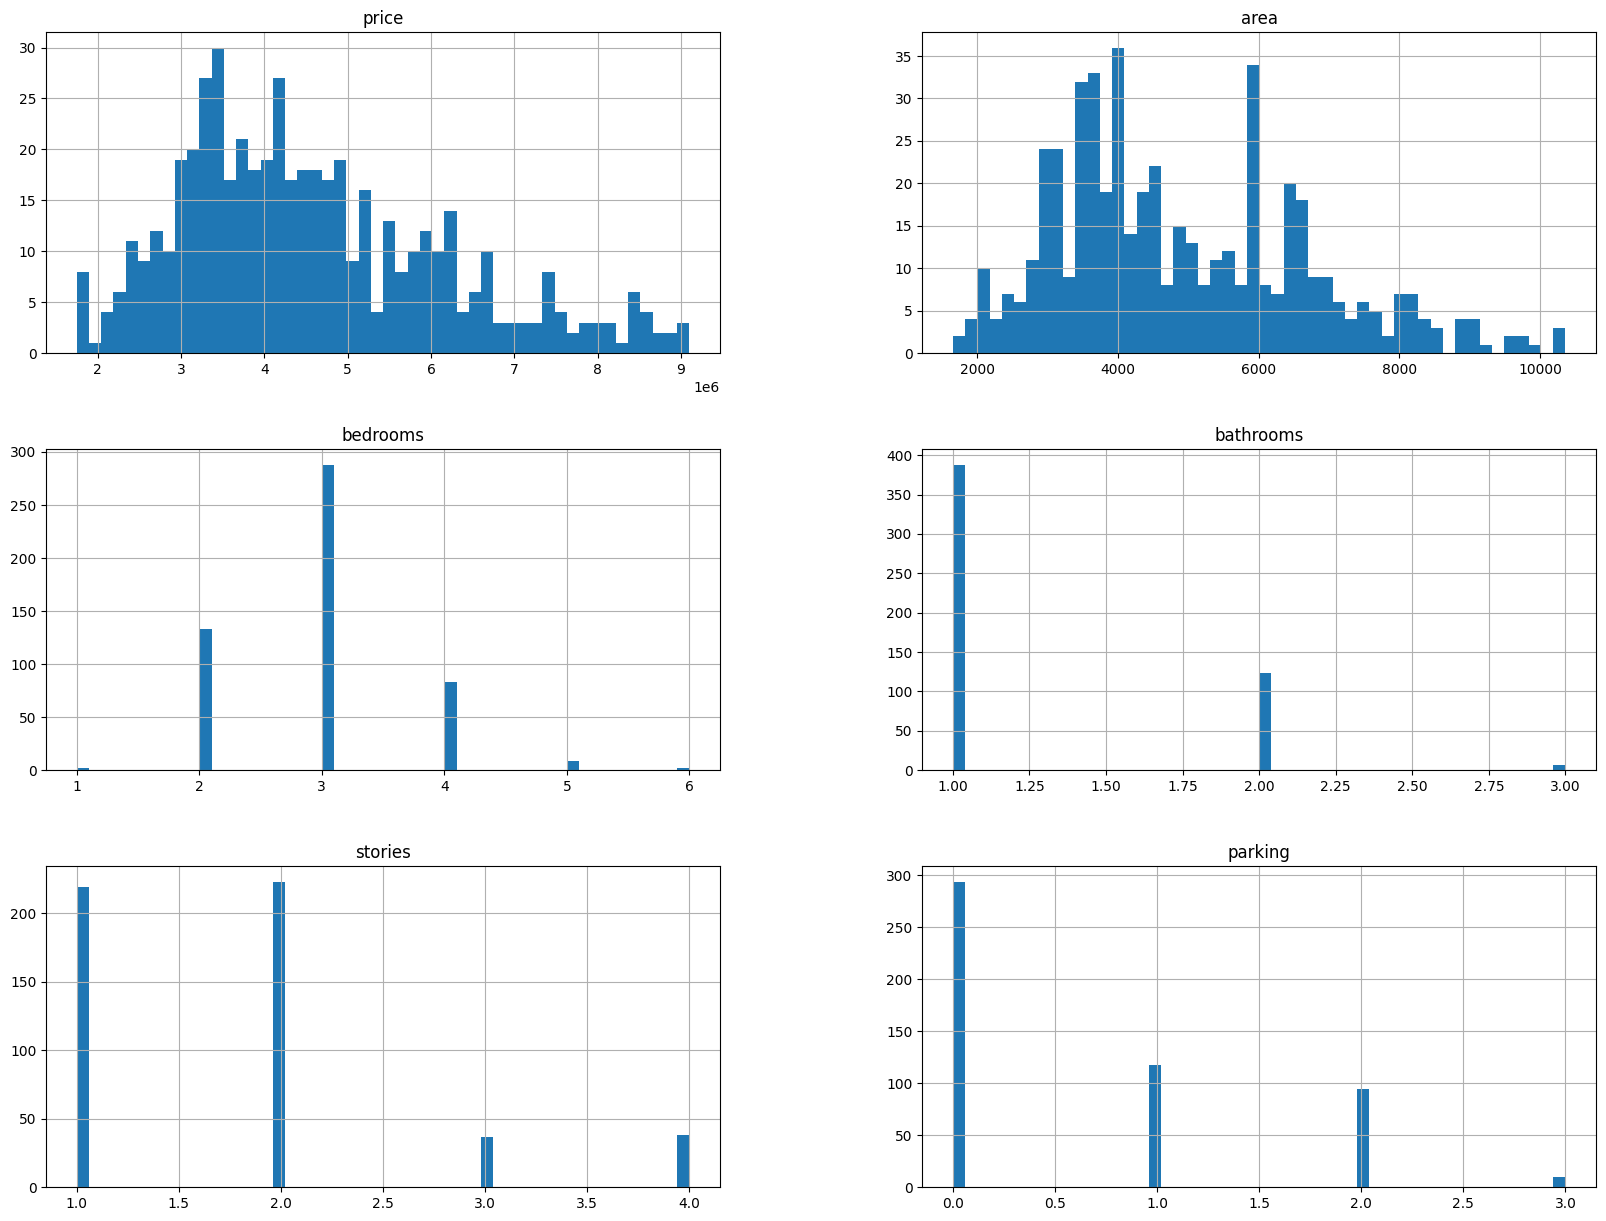

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

     jumlah sampel  persentase
yes            440        85.1
no              77        14.9


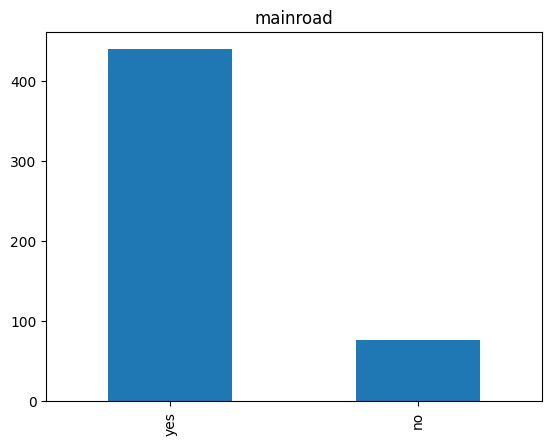

In [13]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no             425        82.2
yes             92        17.8


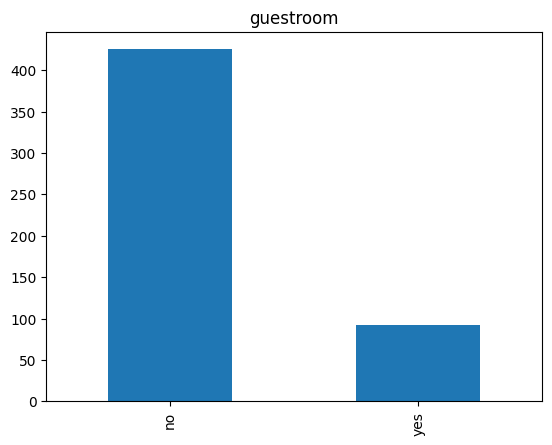

In [14]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no             338        65.4
yes            179        34.6


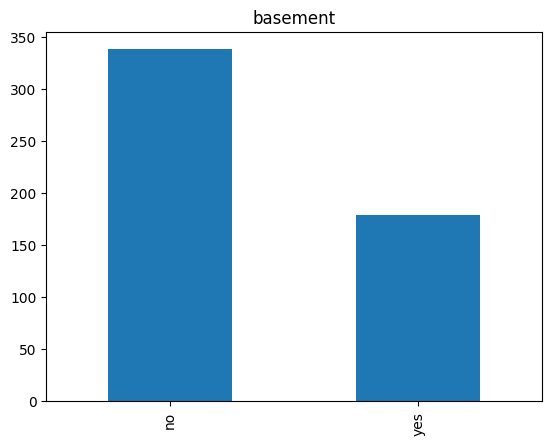

In [15]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df3 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df3)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no             495        95.7
yes             22         4.3


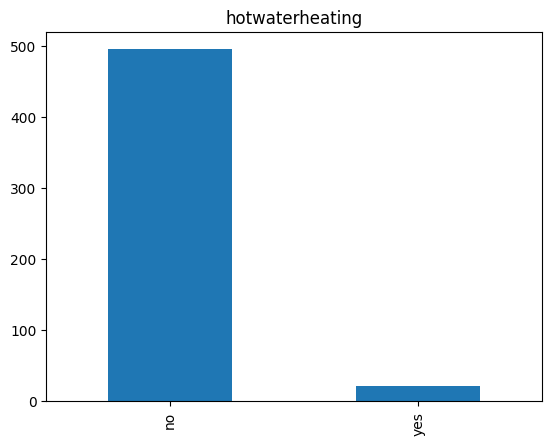

In [16]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df4 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df4)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no             358        69.2
yes            159        30.8


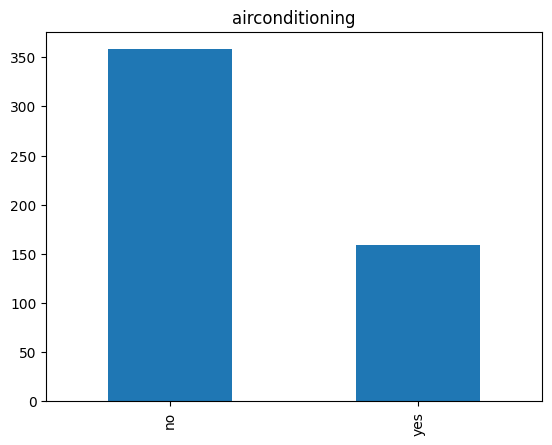

In [17]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df5 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df5)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no             405        78.3
yes            112        21.7


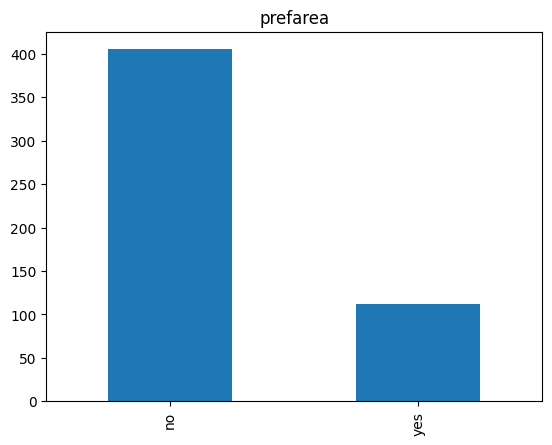

In [18]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df6 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df6)
count.plot(kind='bar', title=feature);

## **Multivariate Analysis**

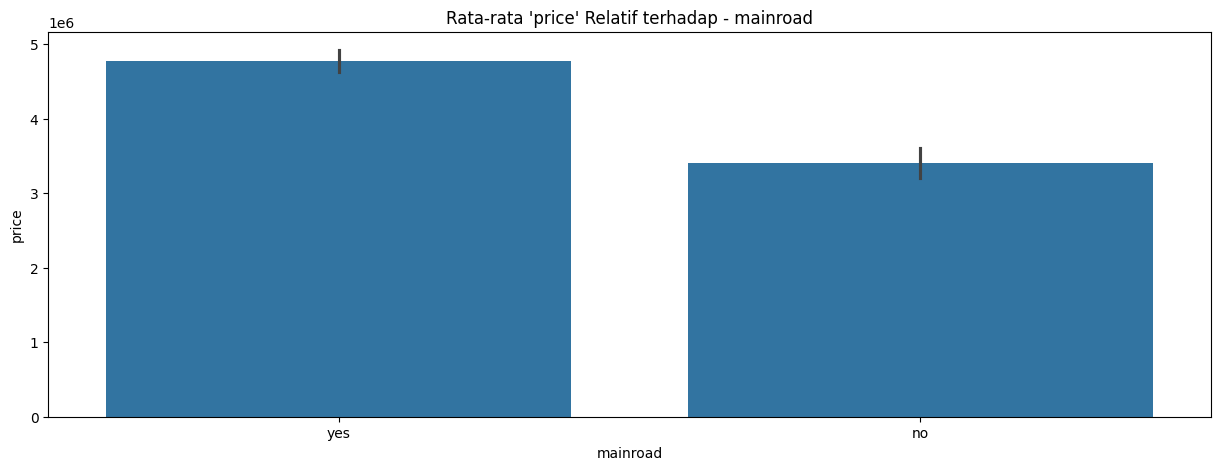

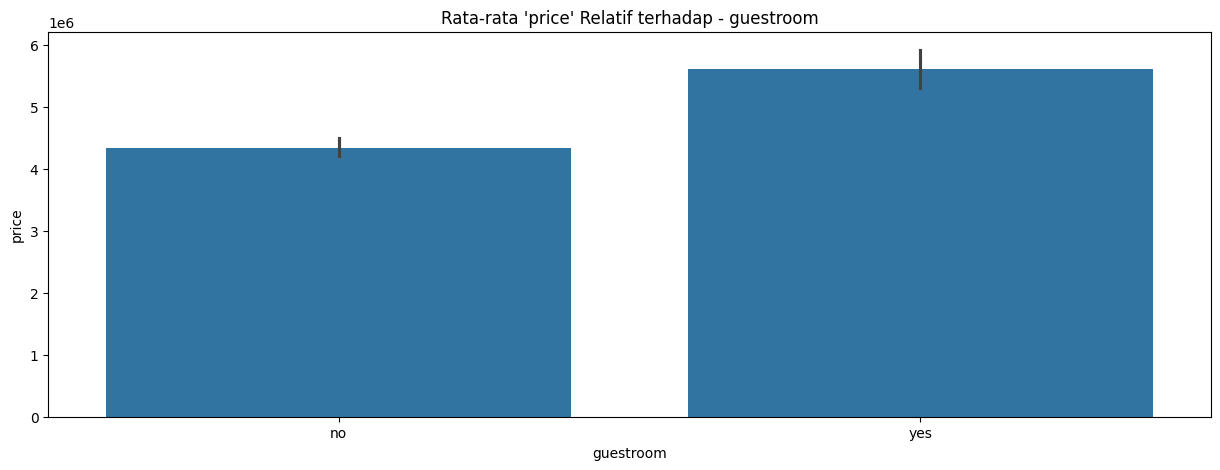

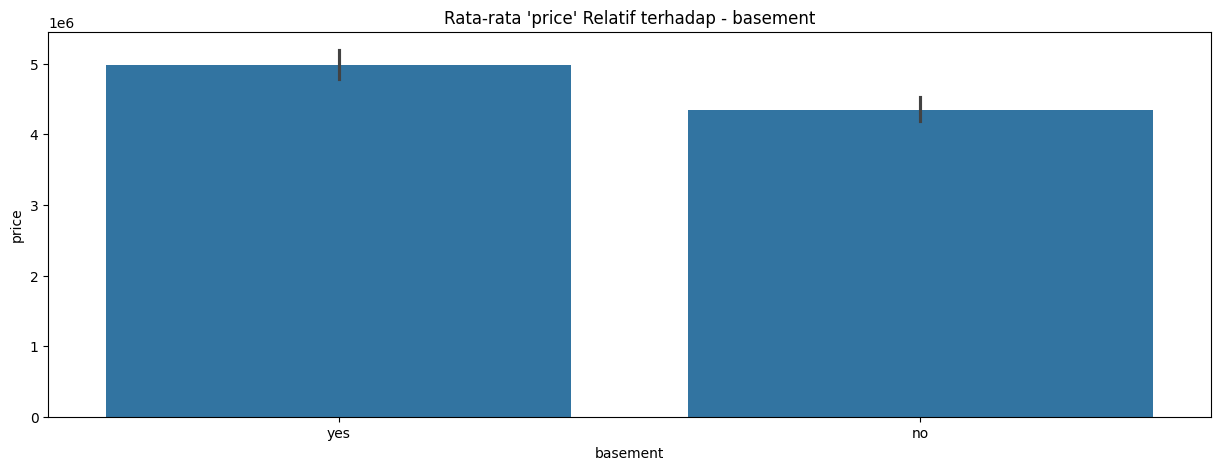

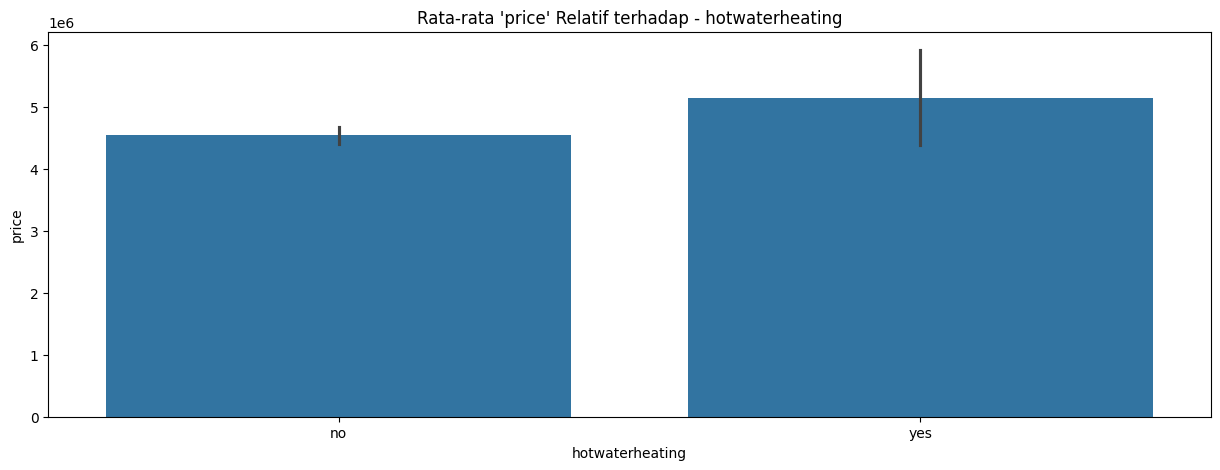

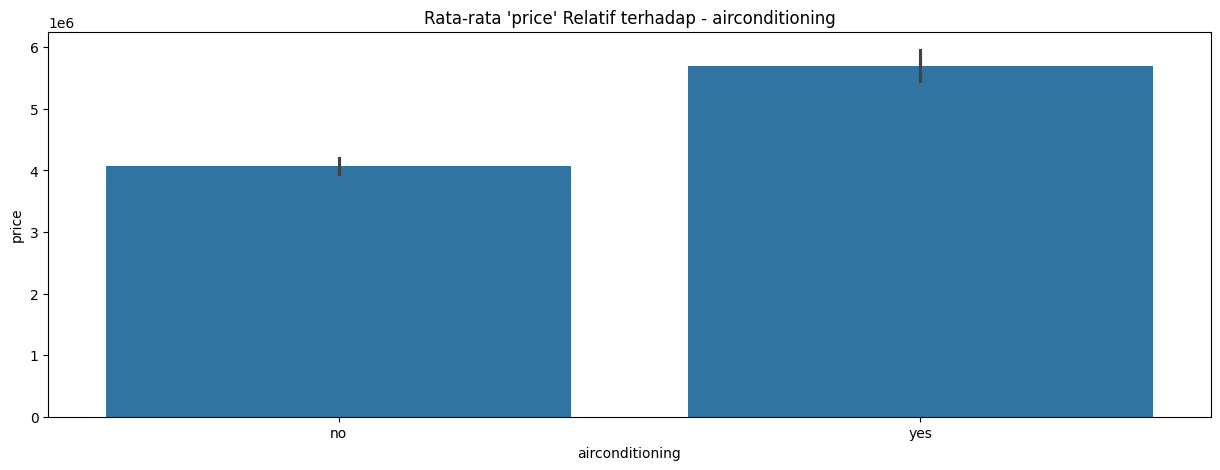

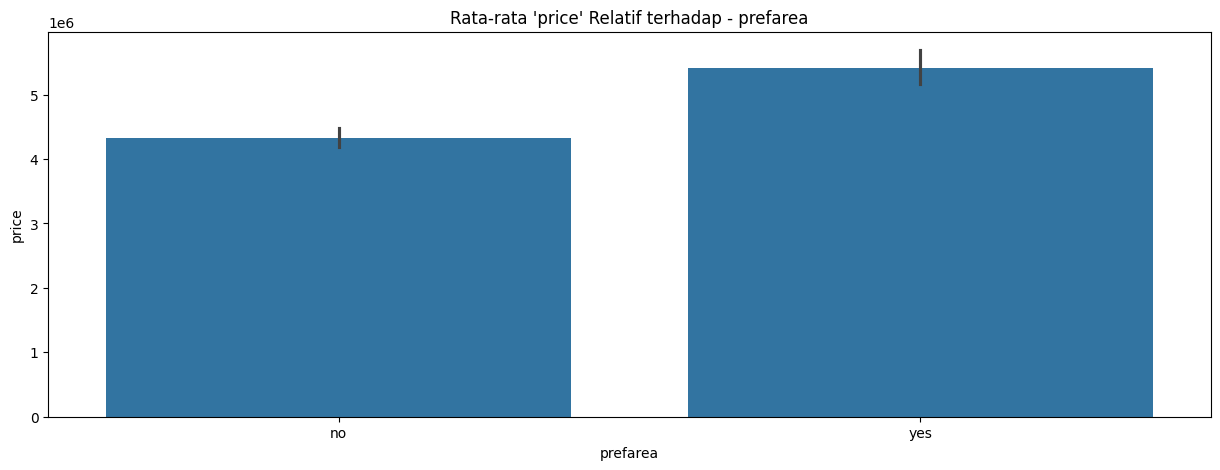

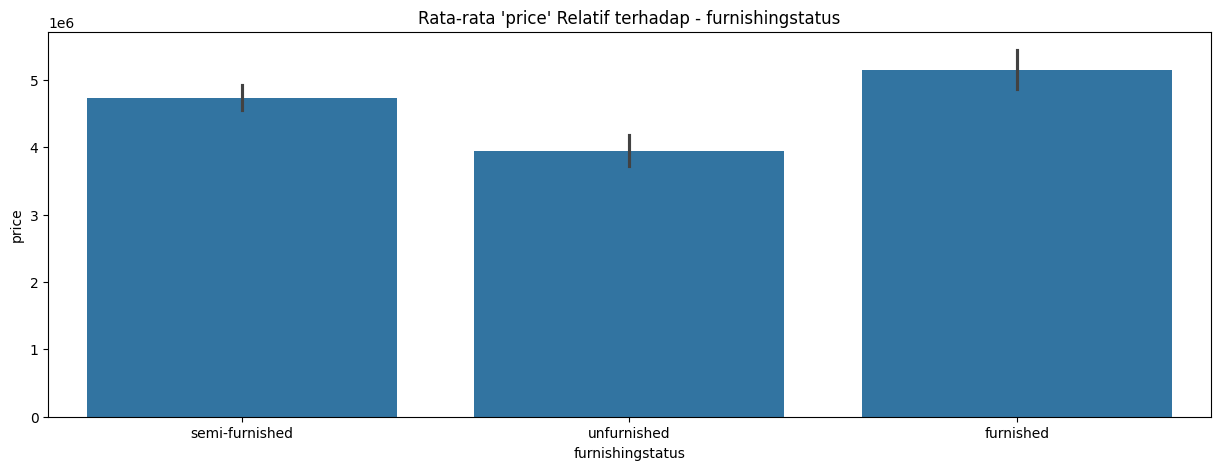

In [19]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))  # Adjust figure size
    sns.barplot(x=col, y="price", data=df)
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))
    plt.show()

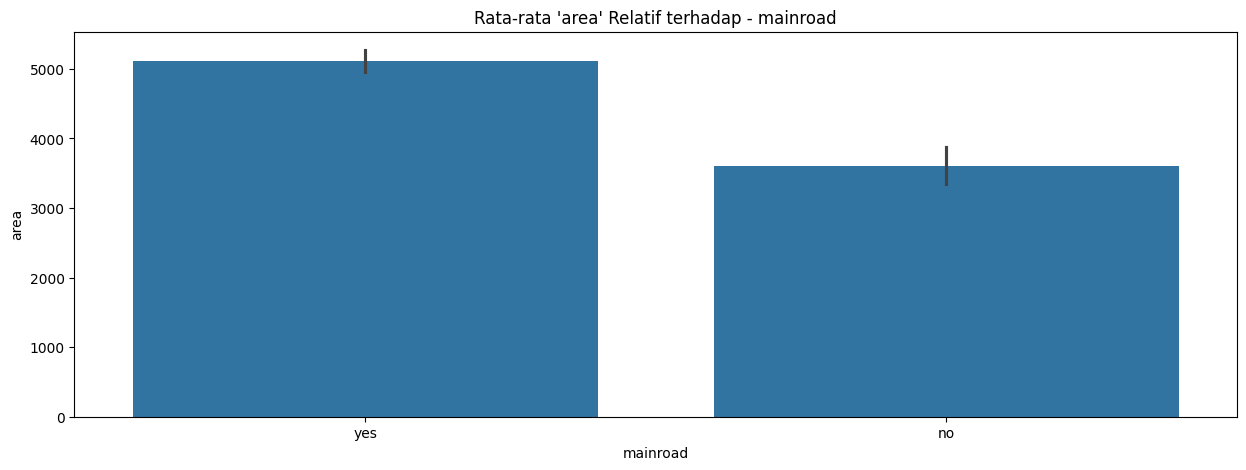

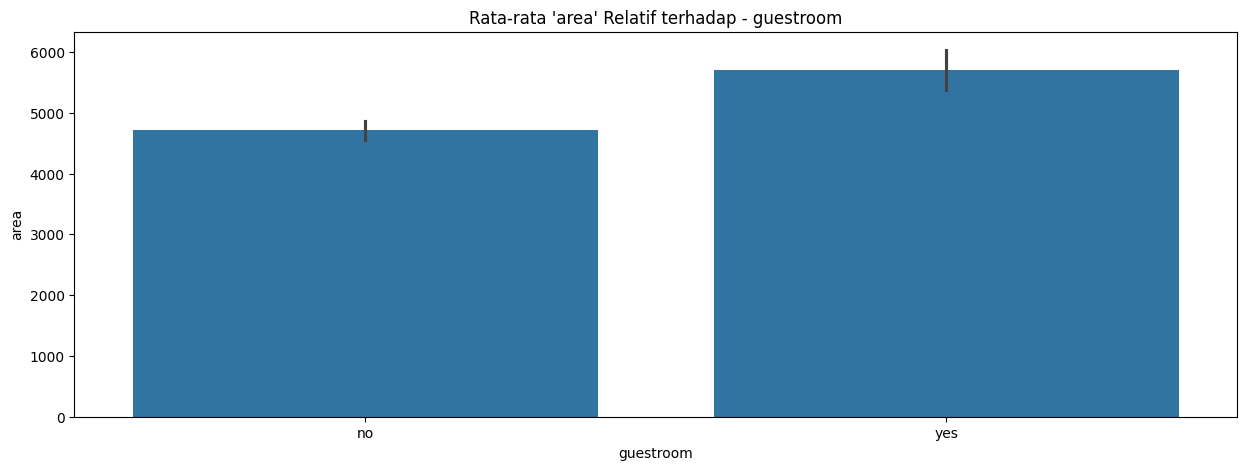

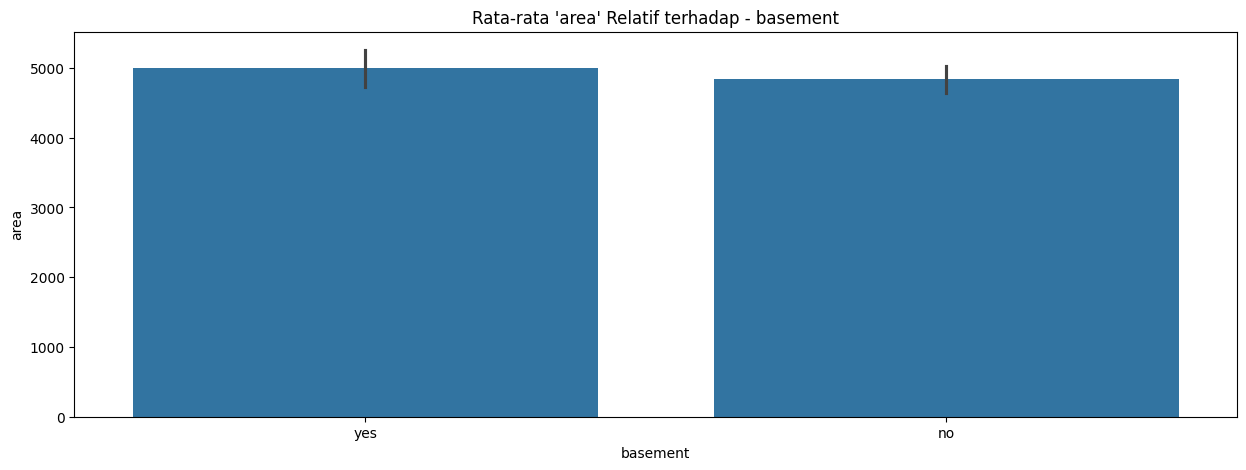

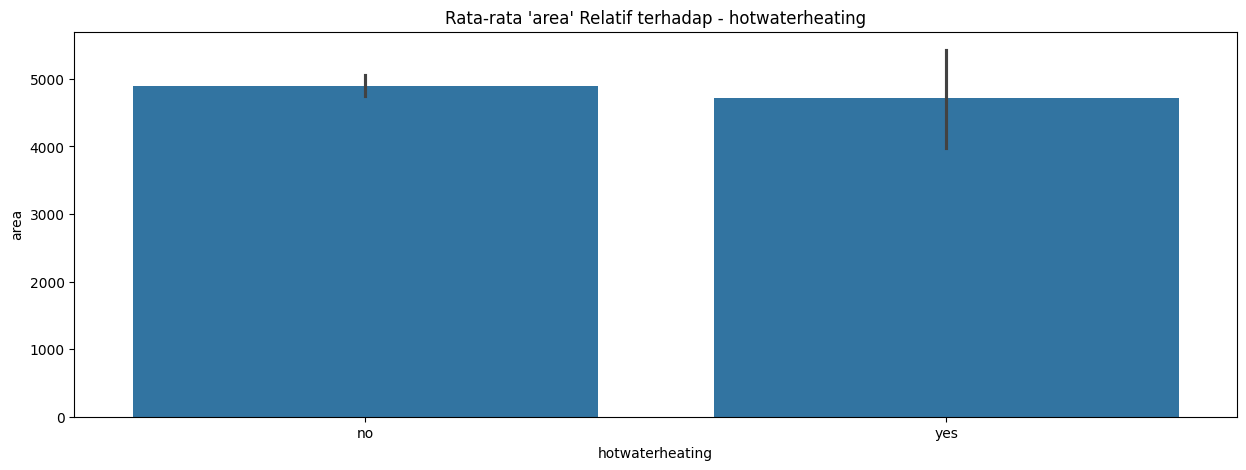

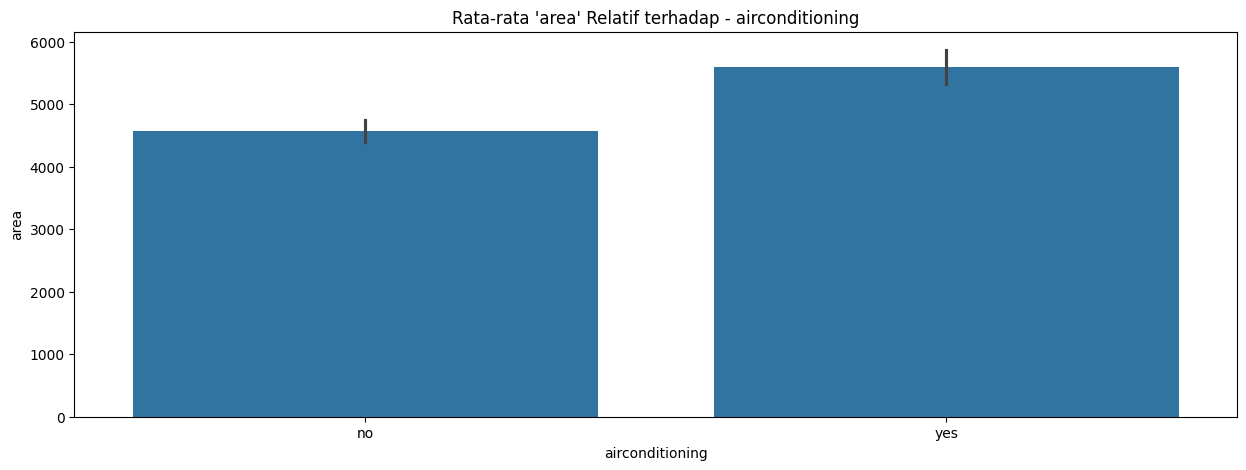

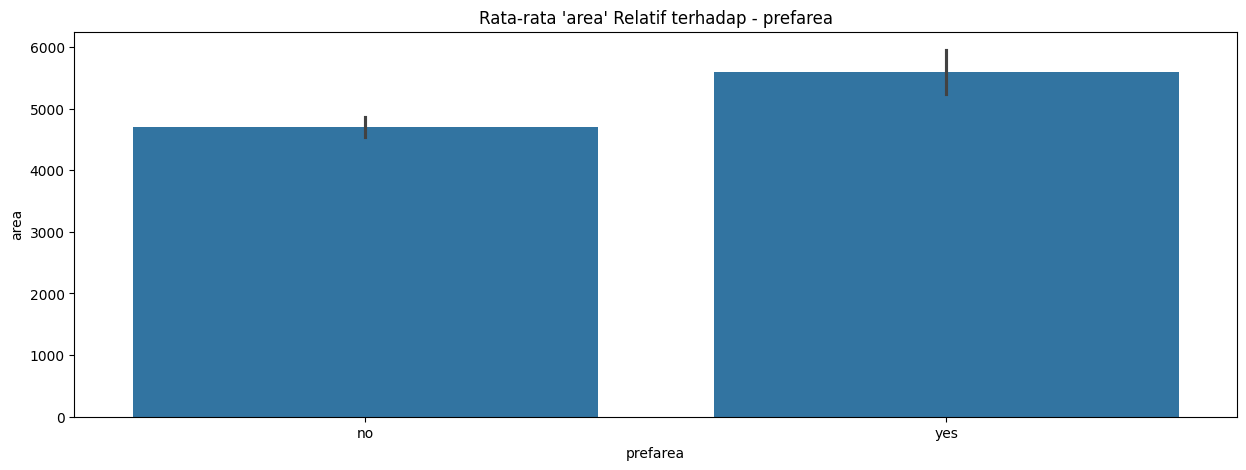

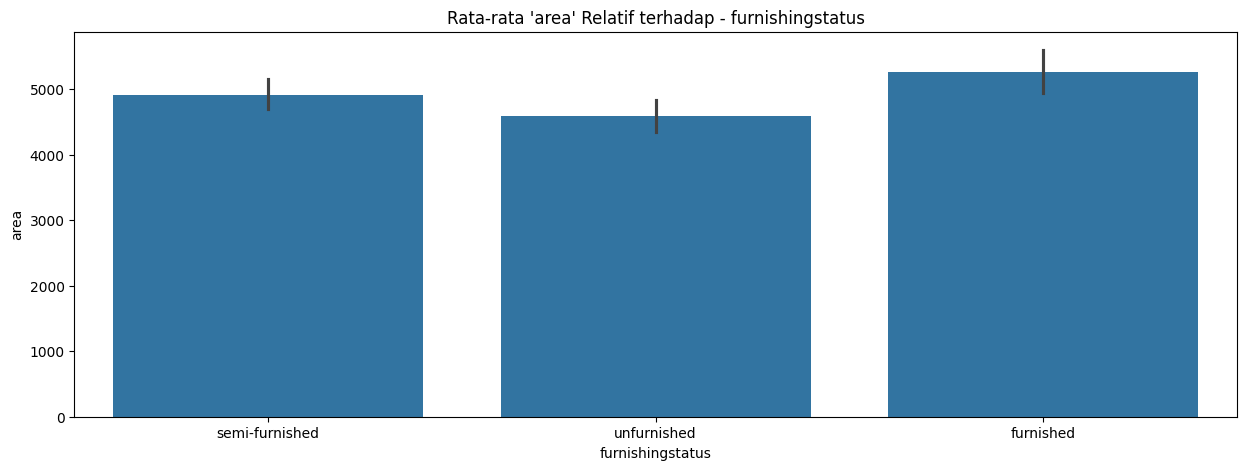

In [20]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))  # Adjust figure size
    sns.barplot(x=col, y="area", data=df)
    plt.title("Rata-rata 'area' Relatif terhadap - {}".format(col))
    plt.show()

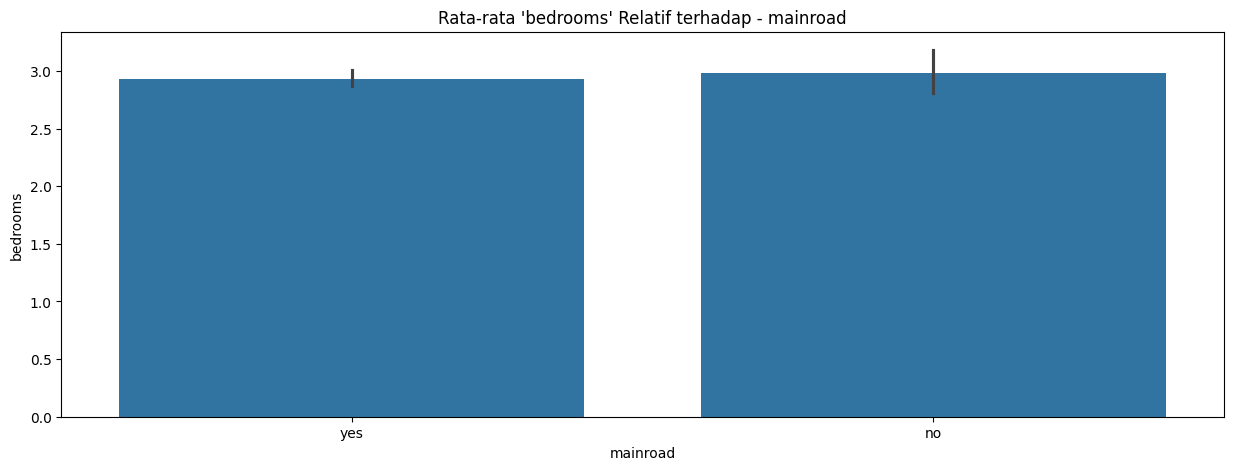

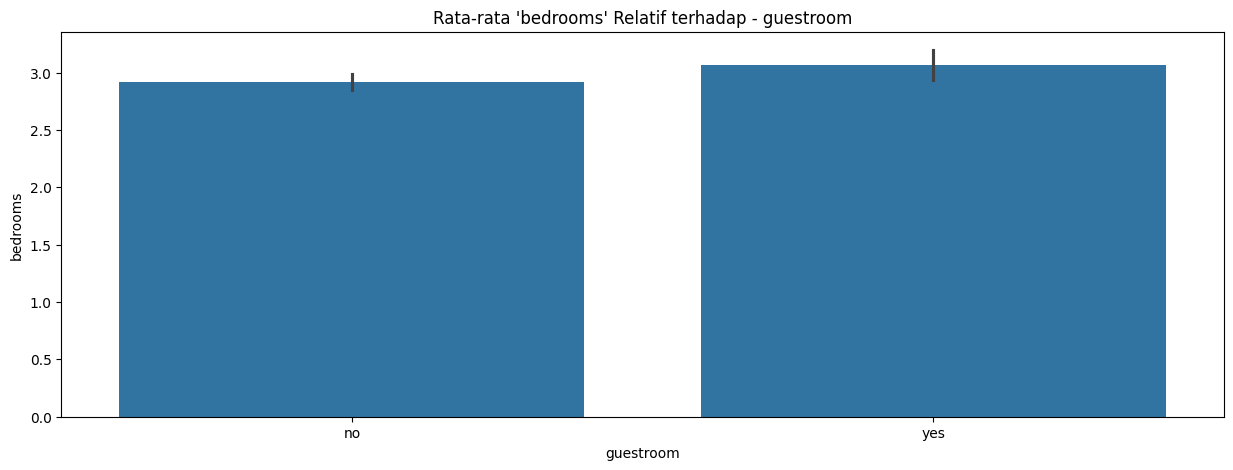

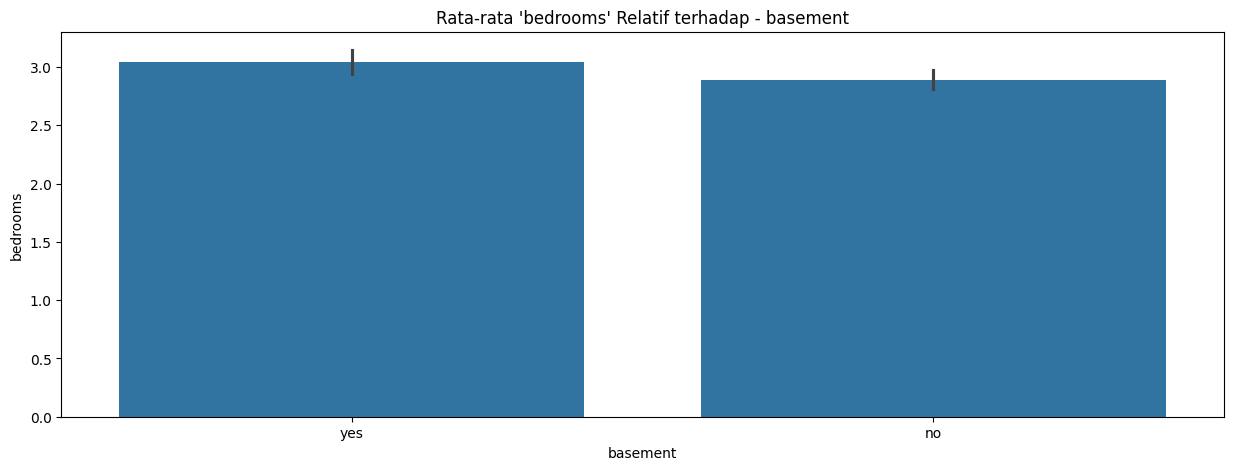

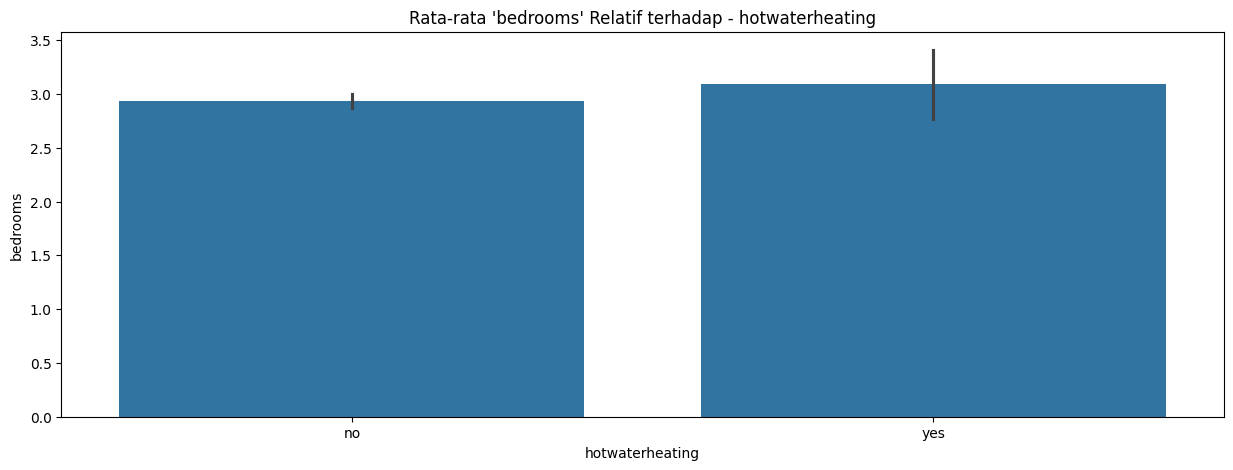

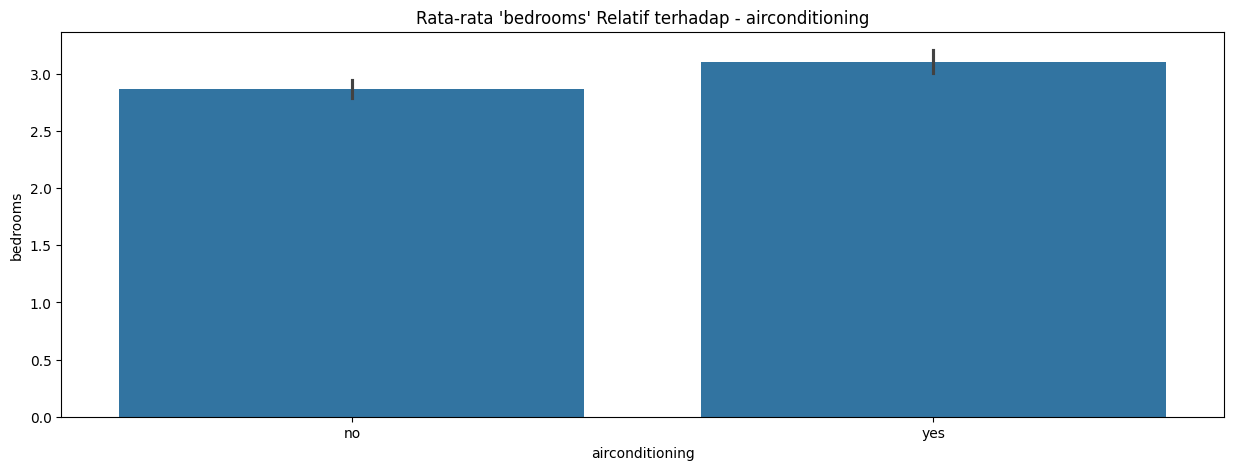

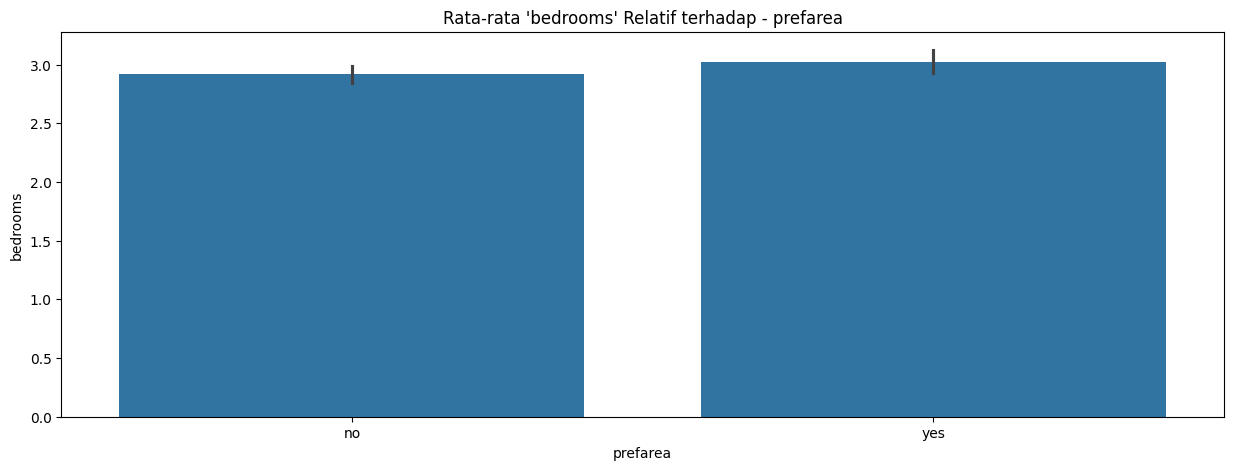

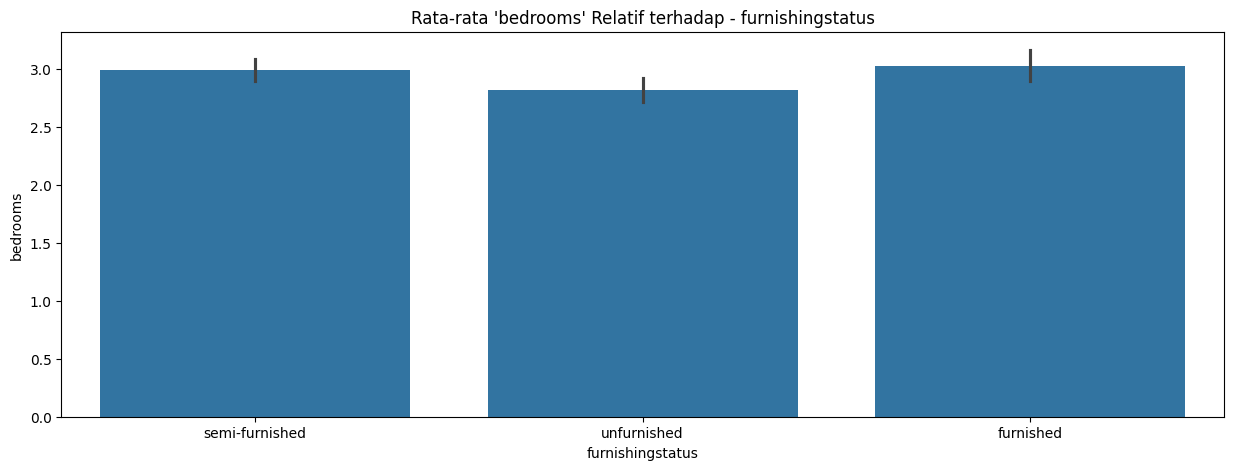

In [21]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))  # Adjust figure size
    sns.barplot(x=col, y="bedrooms", data=df)
    plt.title("Rata-rata 'bedrooms' Relatif terhadap - {}".format(col))
    plt.show()

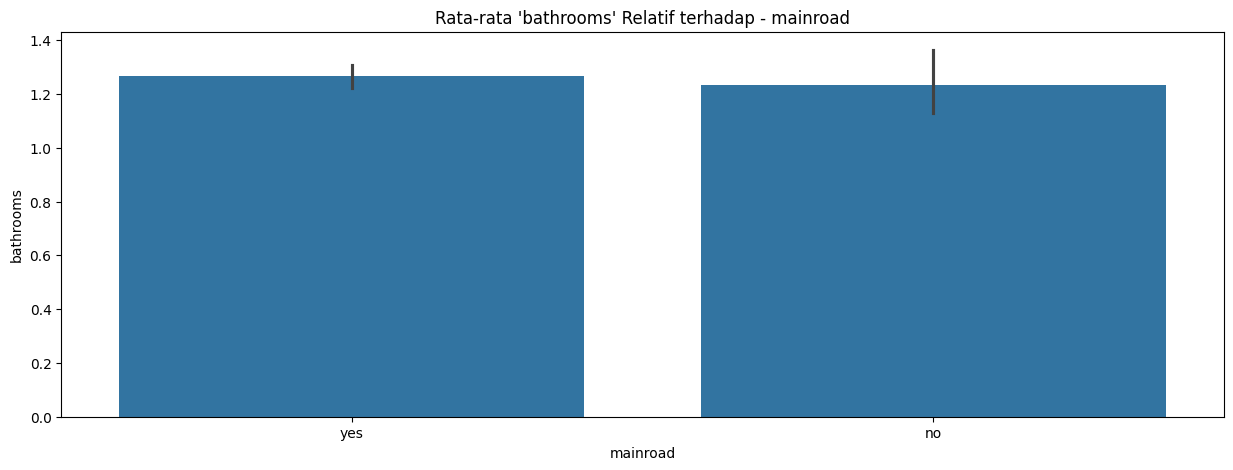

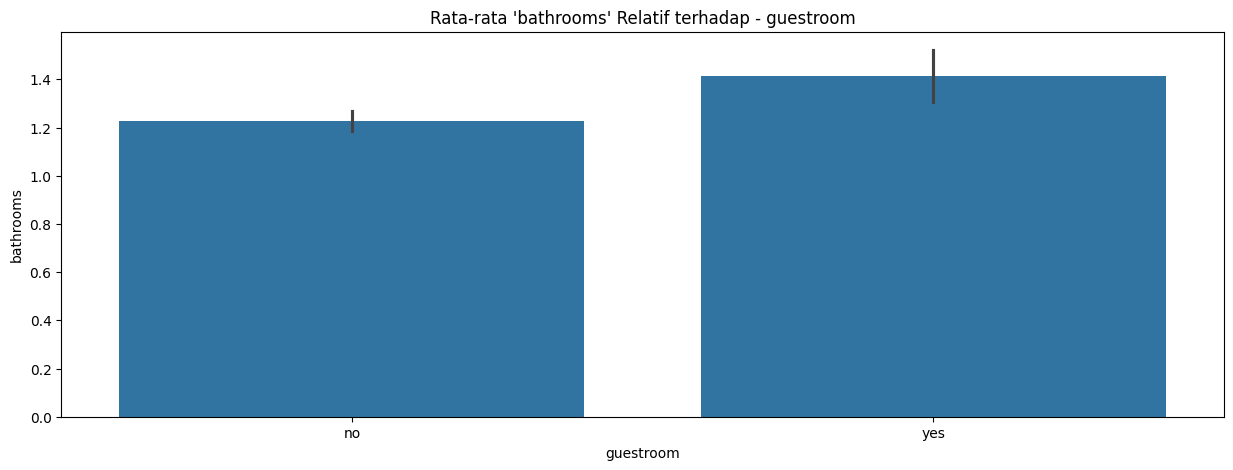

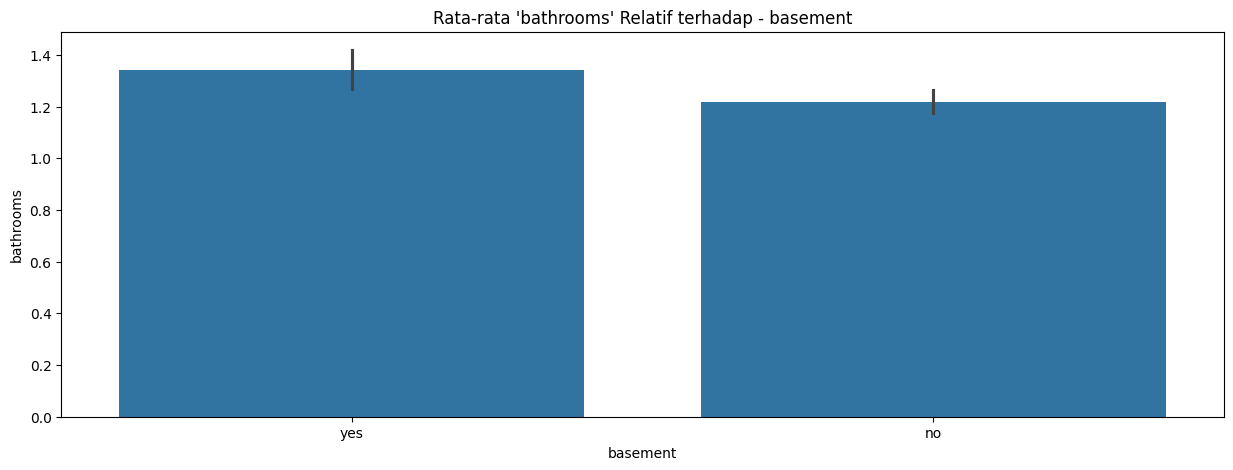

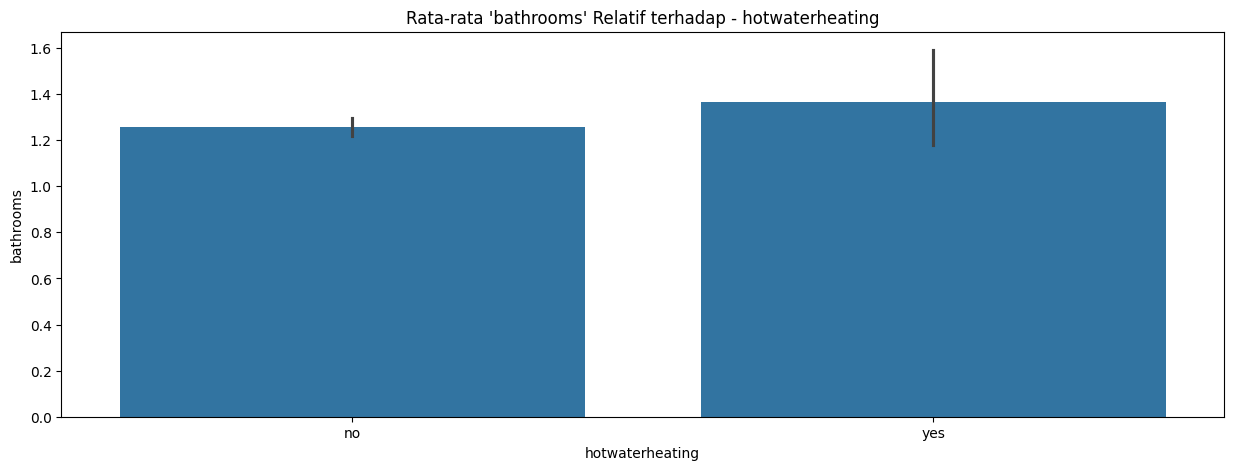

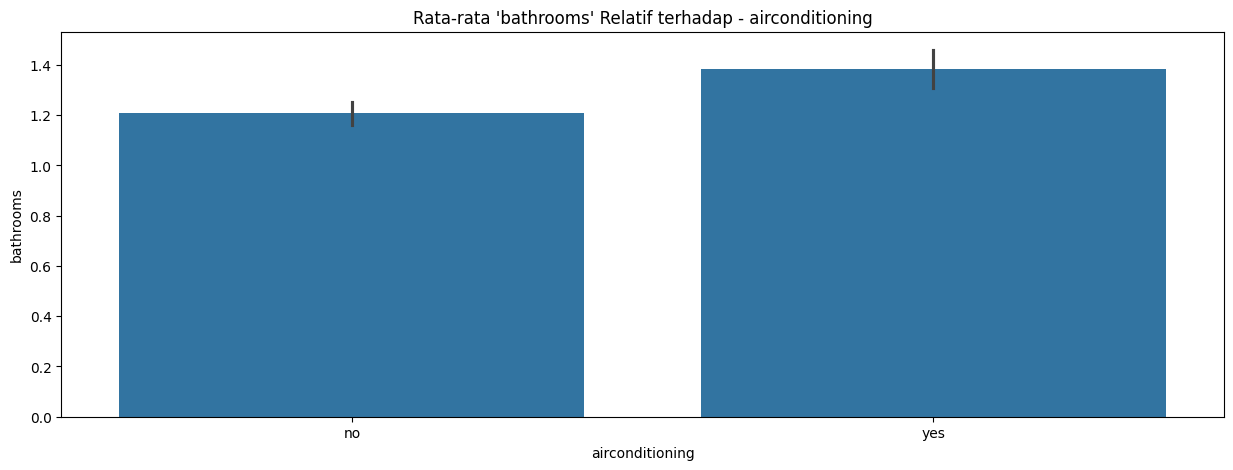

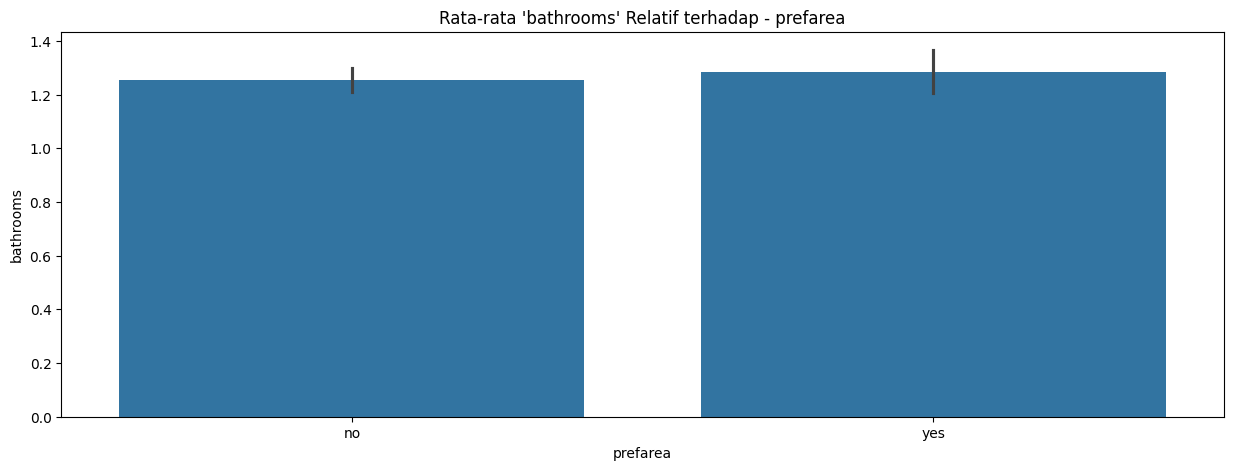

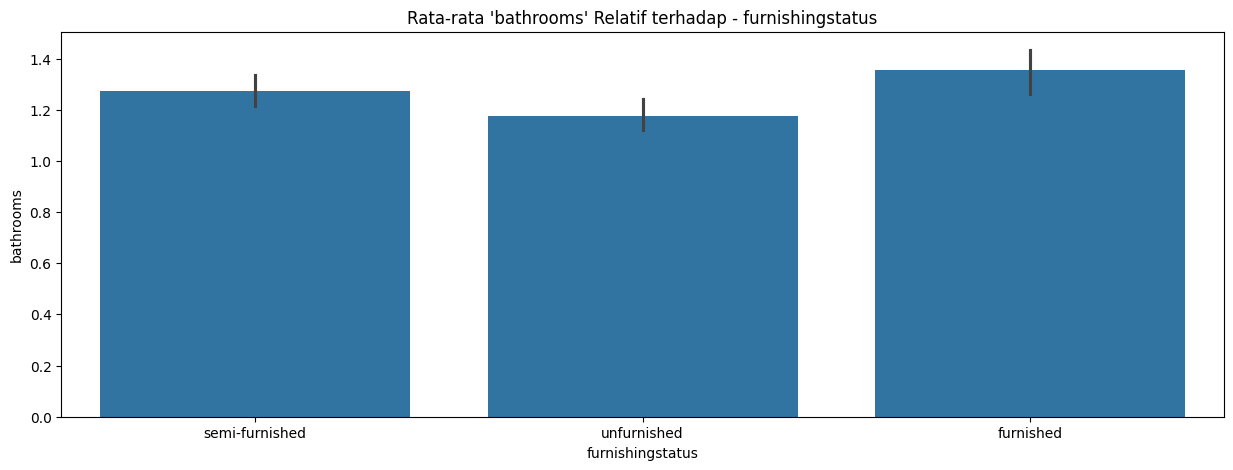

In [22]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))  # Adjust figure size
    sns.barplot(x=col, y="bathrooms", data=df)
    plt.title("Rata-rata 'bathrooms' Relatif terhadap - {}".format(col))
    plt.show()

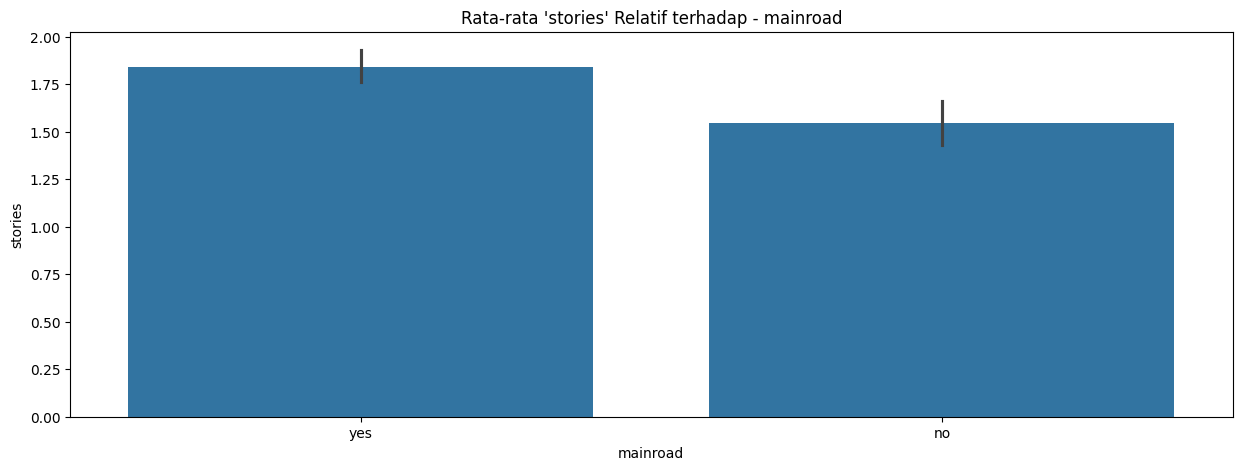

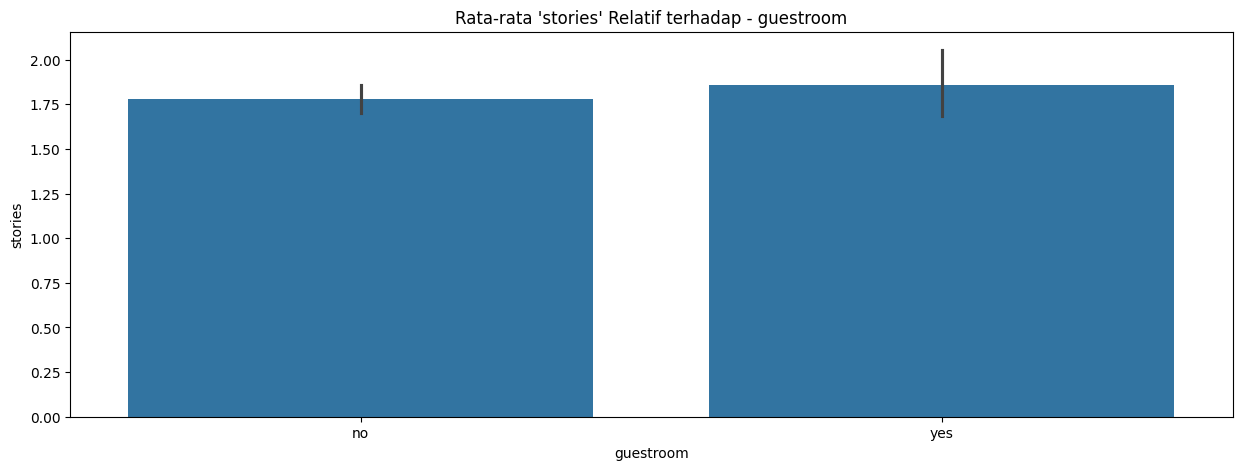

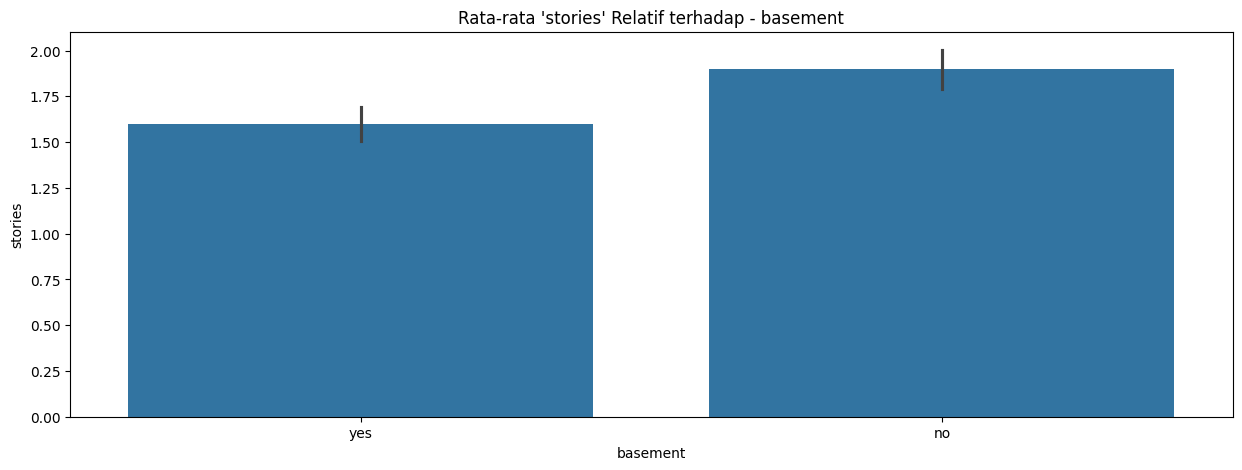

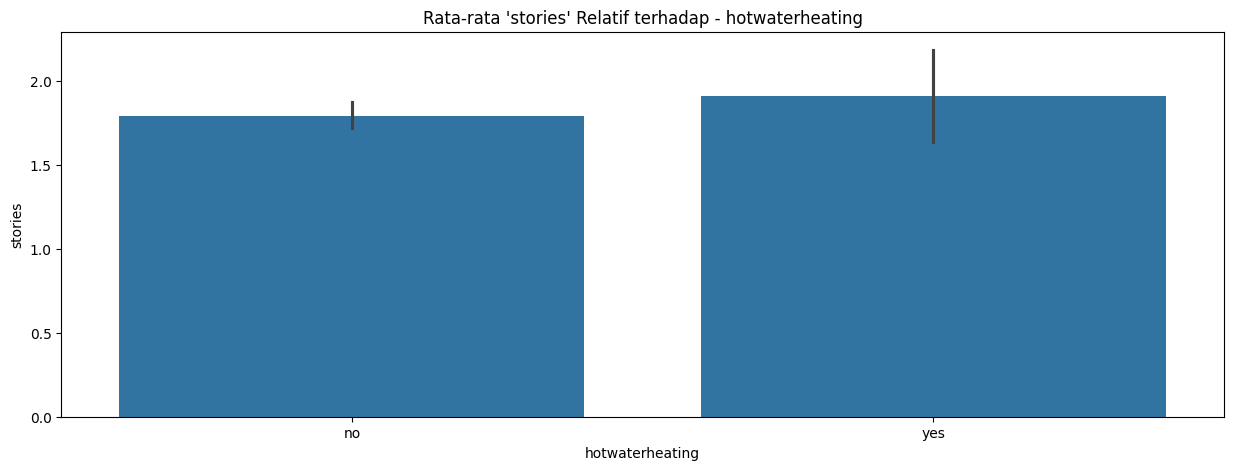

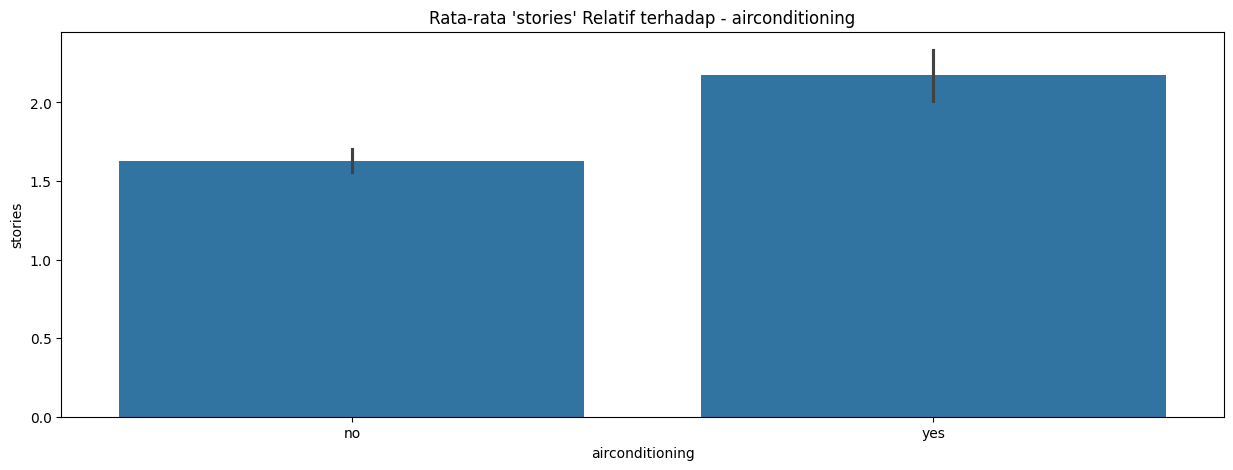

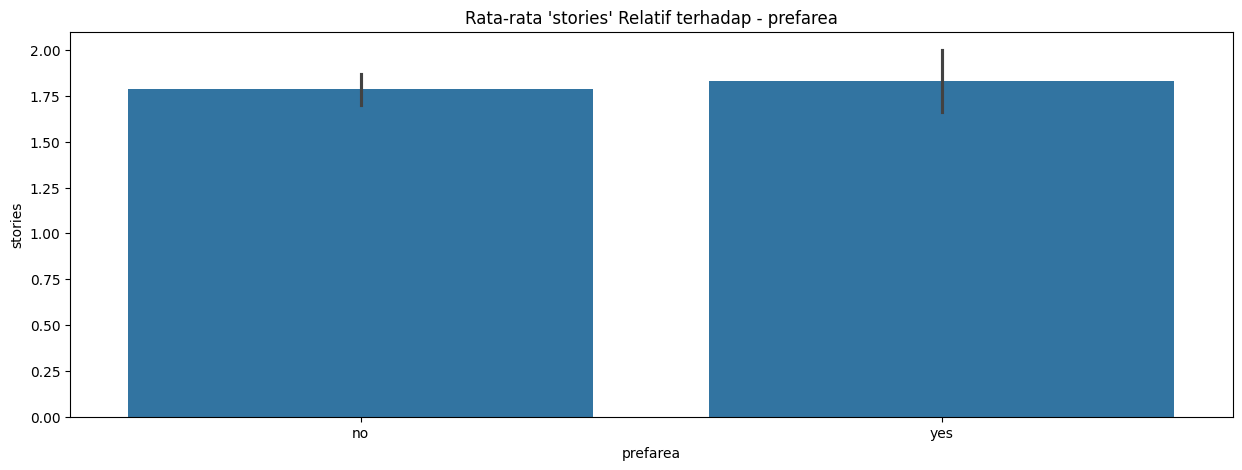

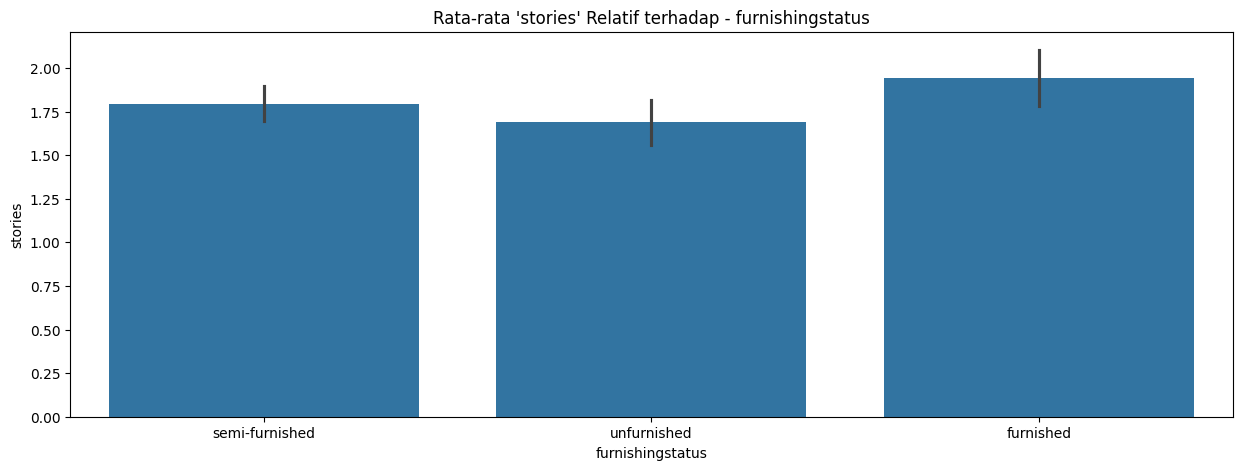

In [23]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))  # Adjust figure size
    sns.barplot(x=col, y="stories", data=df)
    plt.title("Rata-rata 'stories' Relatif terhadap - {}".format(col))
    plt.show()

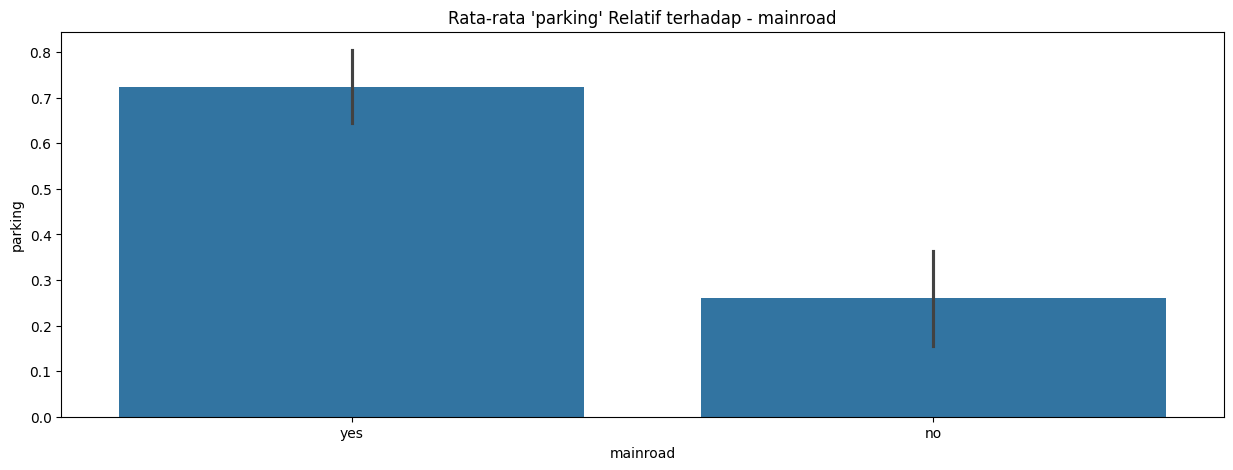

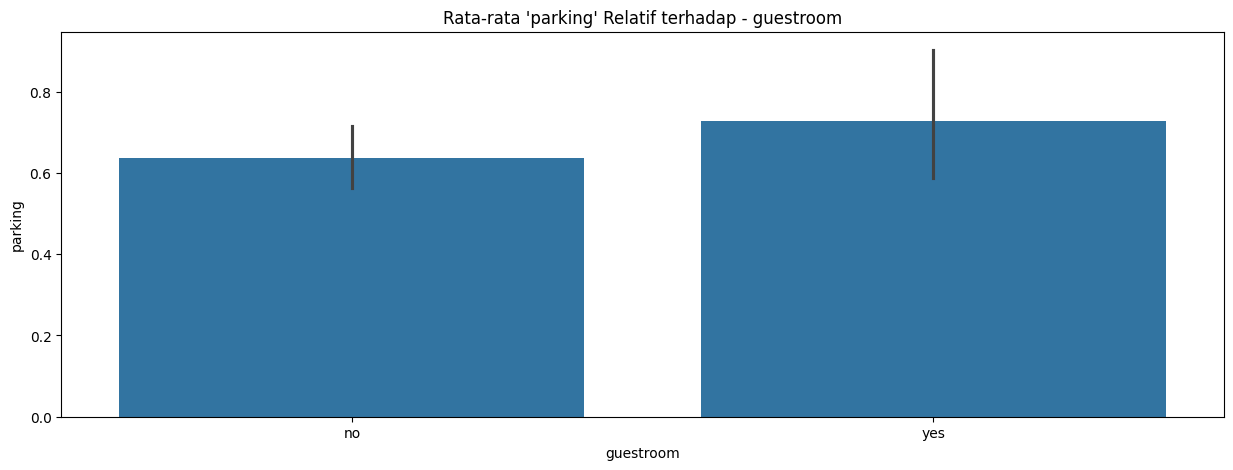

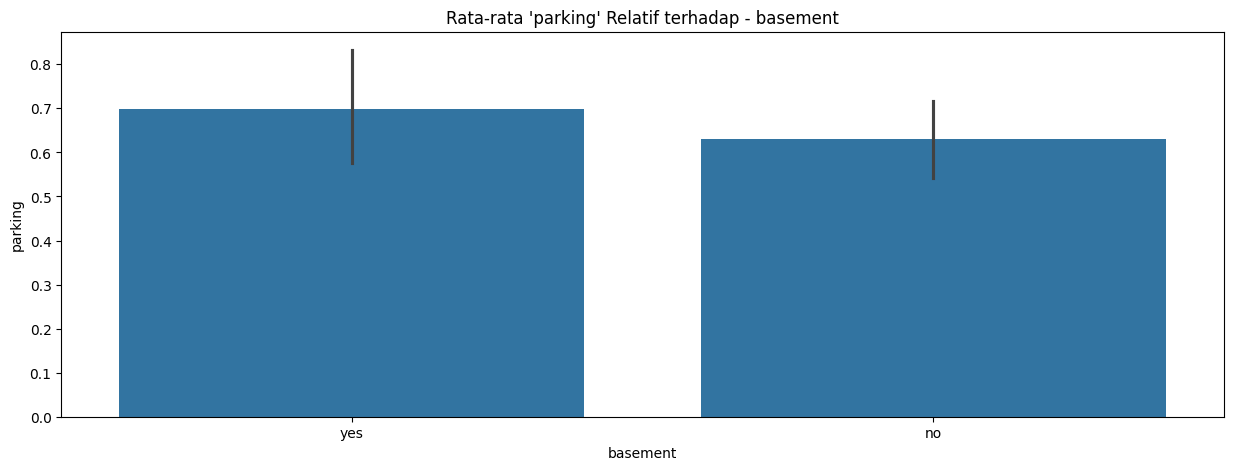

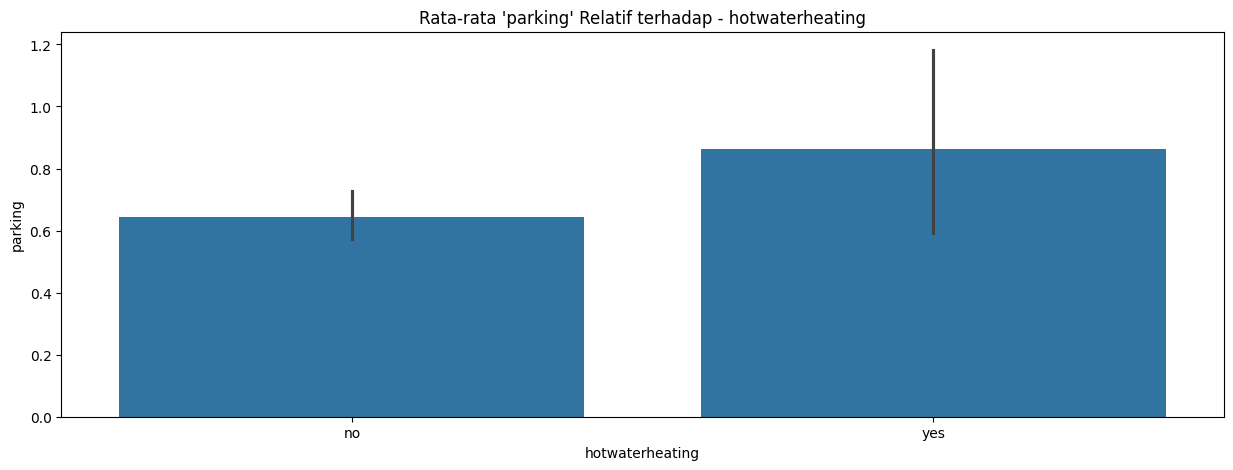

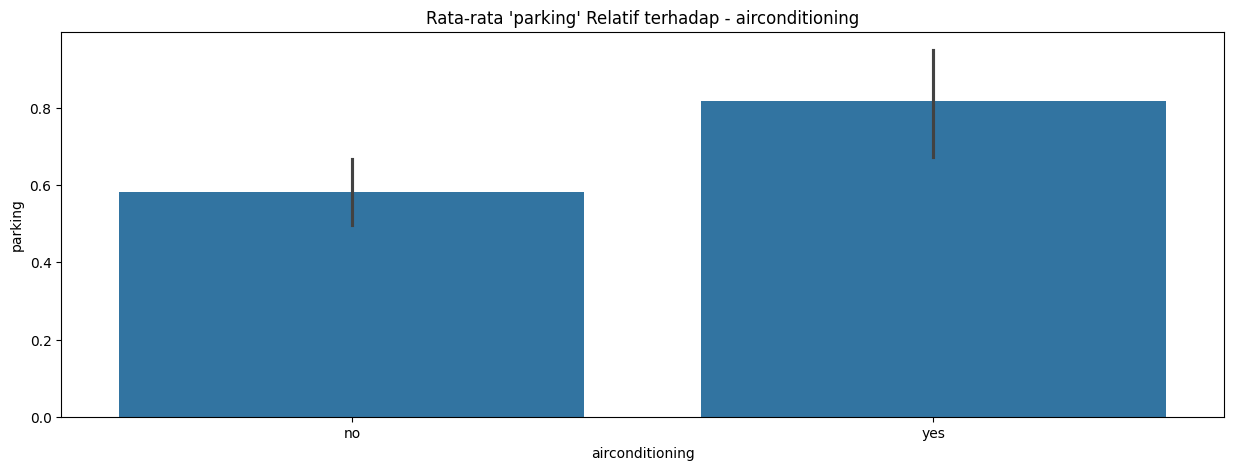

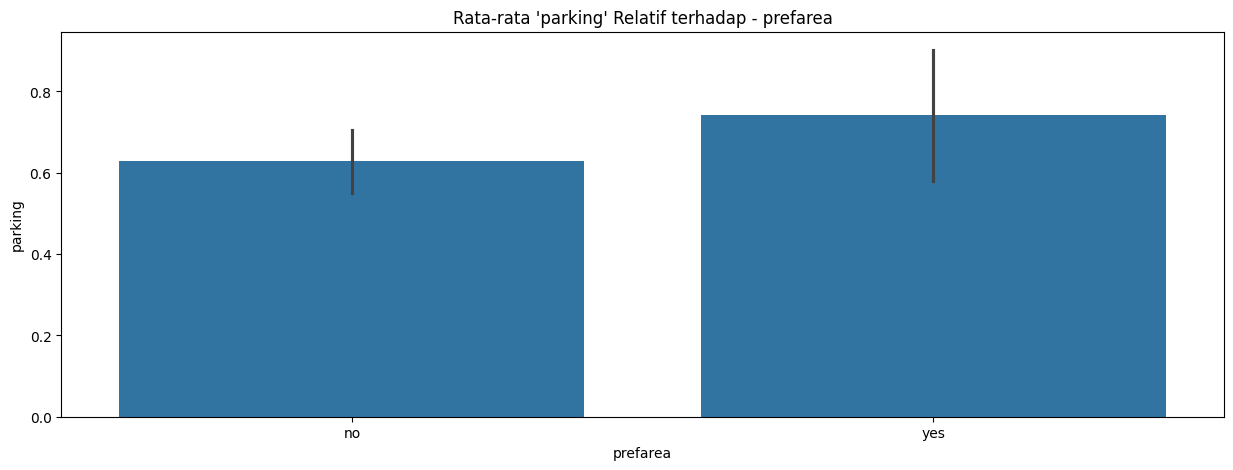

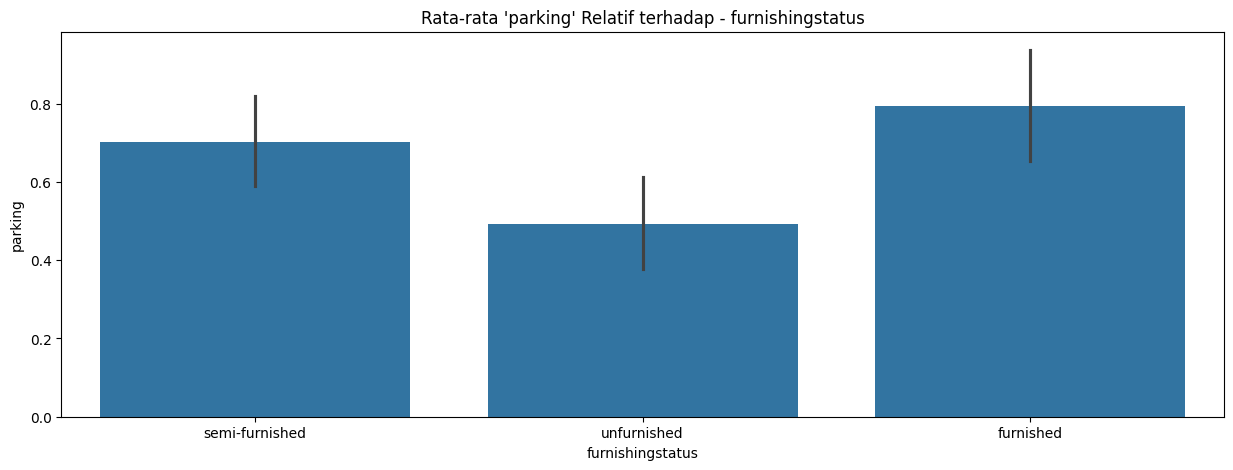

In [24]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))  # Adjust figure size
    sns.barplot(x=col, y="parking", data=df)
    plt.title("Rata-rata 'parking' Relatif terhadap - {}".format(col))
    plt.show()

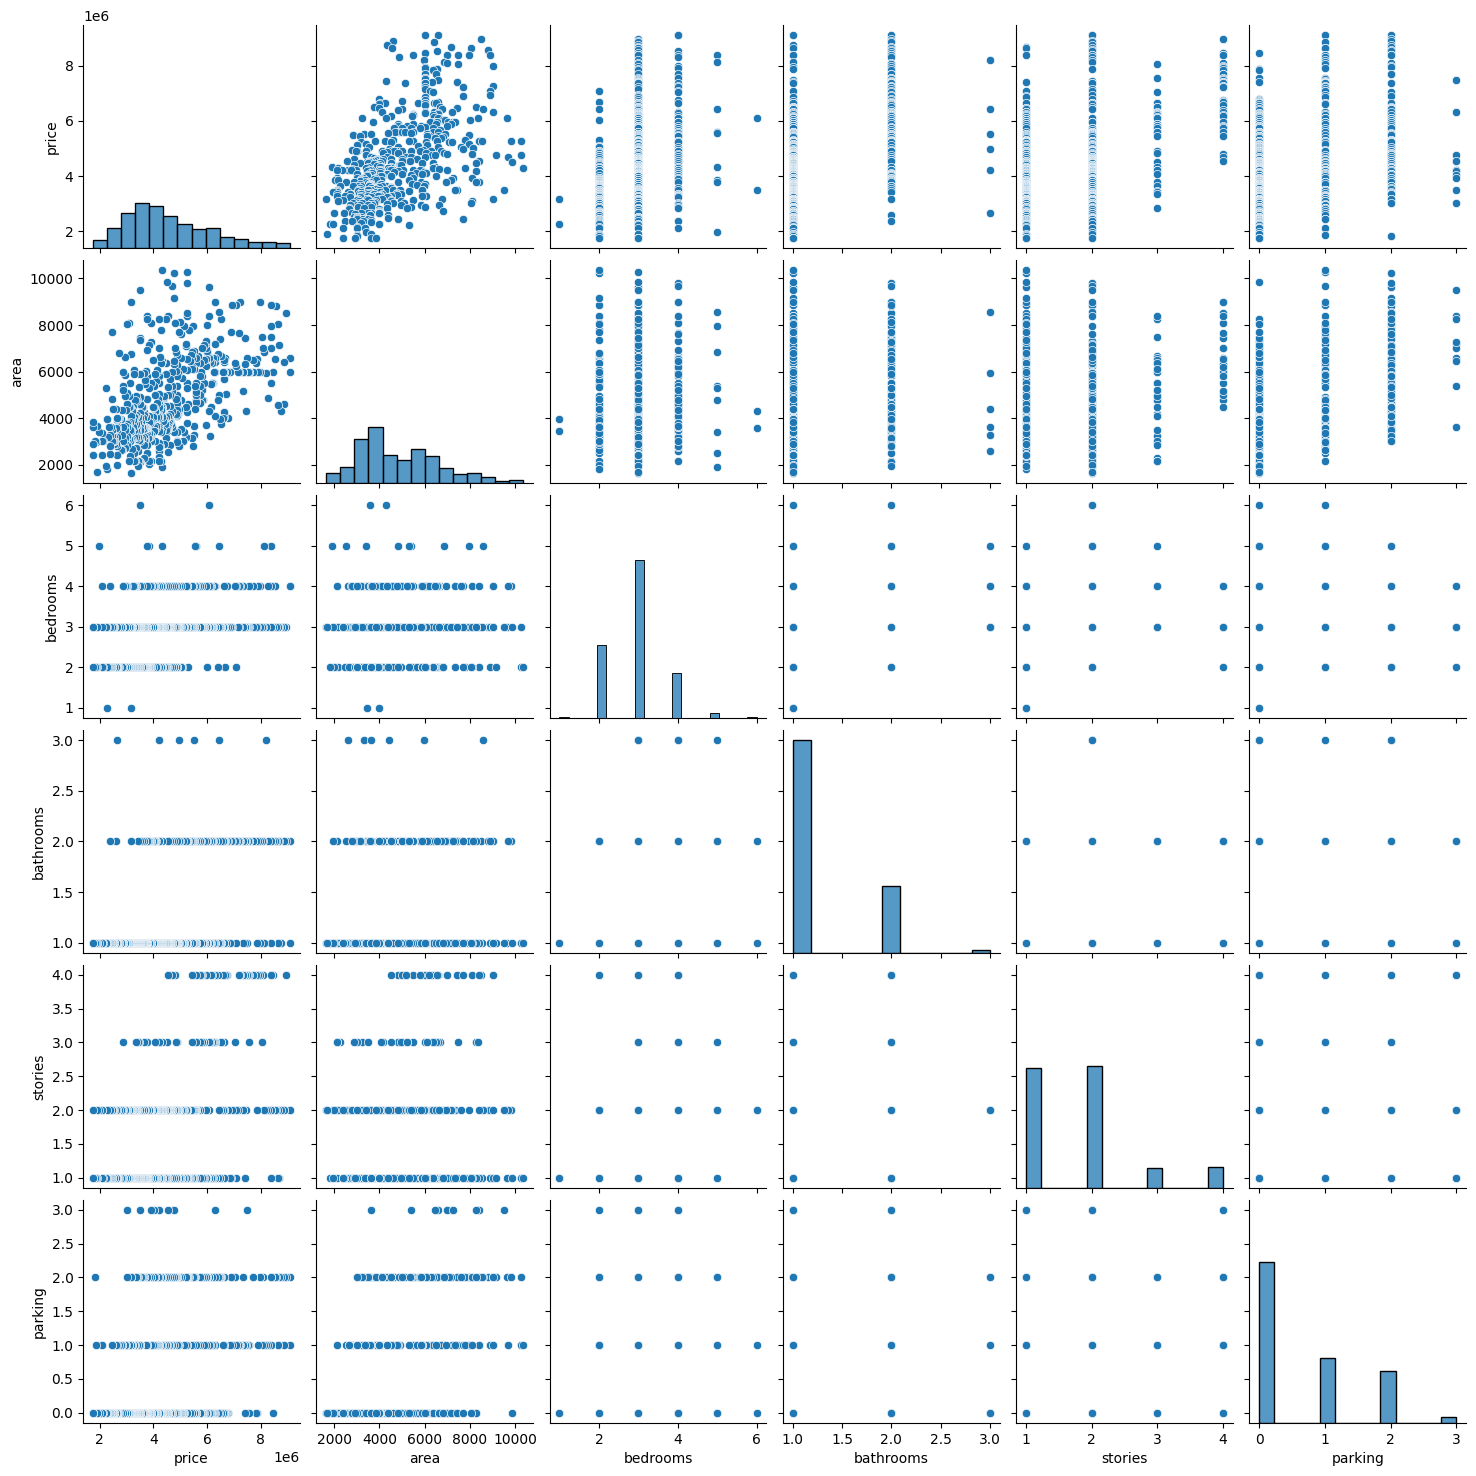

In [25]:
sns.pairplot(df)
plt.show()

<ipython-input-26-b0df64929d97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

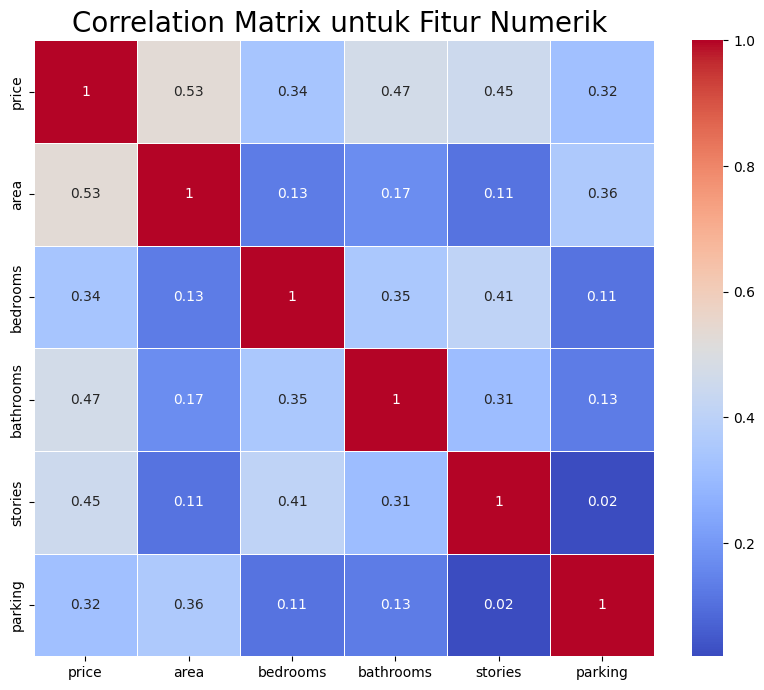

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## **Data Preparation**
### **Encoding Fitur Kategori**

In [27]:
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[categorical_features[0:-1]] = df[categorical_features[0:-1]].apply(binary_map)

In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [29]:
furnishingstatus = pd.get_dummies(df[categorical_features[-1]])

In [30]:
furnishingstatus.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [31]:
furnishingstatus = furnishingstatus.iloc[:, :-1]

In [32]:
df= pd.concat([df,furnishingstatus], axis = 1)

In [33]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [34]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1


### **Train-Test-Split**

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [36]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 517
Total # of sample in train dataset: 465
Total # of sample in test dataset: 52


### **Standarisasi**

In [37]:
from sklearn.preprocessing import StandardScaler

numerical_features = numerical_features[1:]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,area,bedrooms,bathrooms,stories,parking
136,0.304964,1.444649,1.575019,0.232972,1.615137
534,-1.067910,1.444649,-0.560211,0.232972,-0.772903
322,-0.804776,0.079280,1.575019,-0.907364,0.421117
30,1.491927,0.079280,1.575019,2.513645,1.615137
354,2.021055,-1.286090,-0.560211,-0.907364,0.421117


In [38]:
X_train[numerical_features].describe().round(4)

,area,bedrooms,bathrooms,stories,parking
count,465.0000,465.0000,465.0000,465.0000,465.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0011,1.0011,1.0011,1.0011,1.0011
min,-1.8115,-2.6515,-0.5602,-0.9074,-0.7729
25%,-0.7705,-1.2861,-0.5602,-0.9074,-0.7729
50%,-0.2099,0.0793,-0.5602,0.2330,-0.7729
75%,0.6768,0.0793,-0.5602,0.2330,0.4211
max,3.1422,4.1754,3.7102,2.5136,2.8092


## **Model Development**


In [39]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [40]:
acc = pd.DataFrame(index=['accuracy'])

In [45]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
                'n_jobs' :[1,-1]
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'random_state': [11, 33, 55, 77]
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,knn,0.375353,{'n_neighbors': 5}
1,random_forest,0.668375,"{'max_depth': 16, 'n_estimators': 100, 'n_jobs..."
2,boosting,0.574262,"{'learning_rate': 0.1, 'random_state': 11}"


### **K-Nearest Neighbor**

In [46]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

acc.loc['accuracy','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### **Random Forest**

In [47]:
RF = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=33, n_jobs=1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

acc.loc['accuracy','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### **Boosting Algorithm**

In [48]:
boosting = AdaBoostRegressor(learning_rate=0.1, random_state=11)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
acc.loc['accuracy','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## **Evaluasi Model**

In [49]:
acc

,knn,RandomForest,Boosting
accuracy,6.821491e+11,1.351188e+11,8.977552e+11


In [54]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [55]:

mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,682149066.156705,5724387873.076922
RF,135118786.162771,4494885131.828696
Boosting,897755190.600389,3580515918.095606


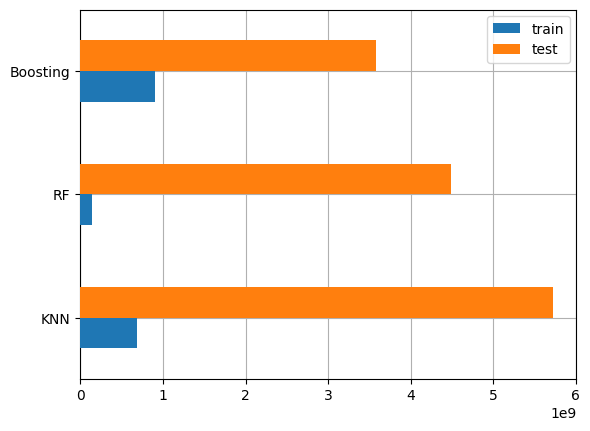

In [56]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [57]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
428,3325000,2667000.0,2342386.7,3160166.2
